<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

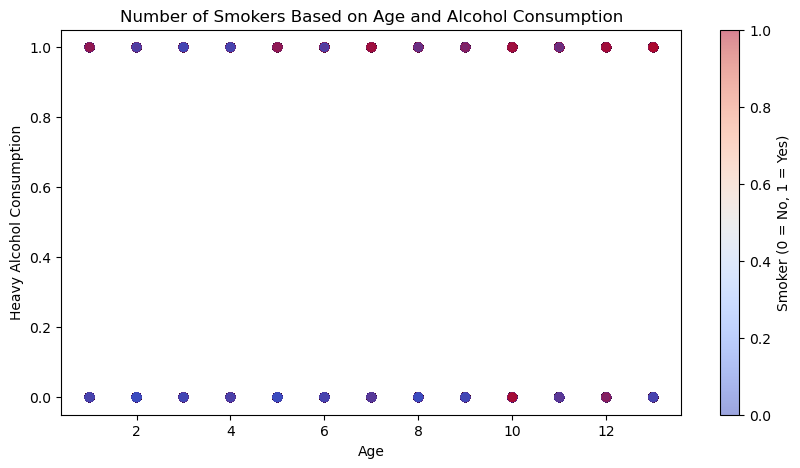

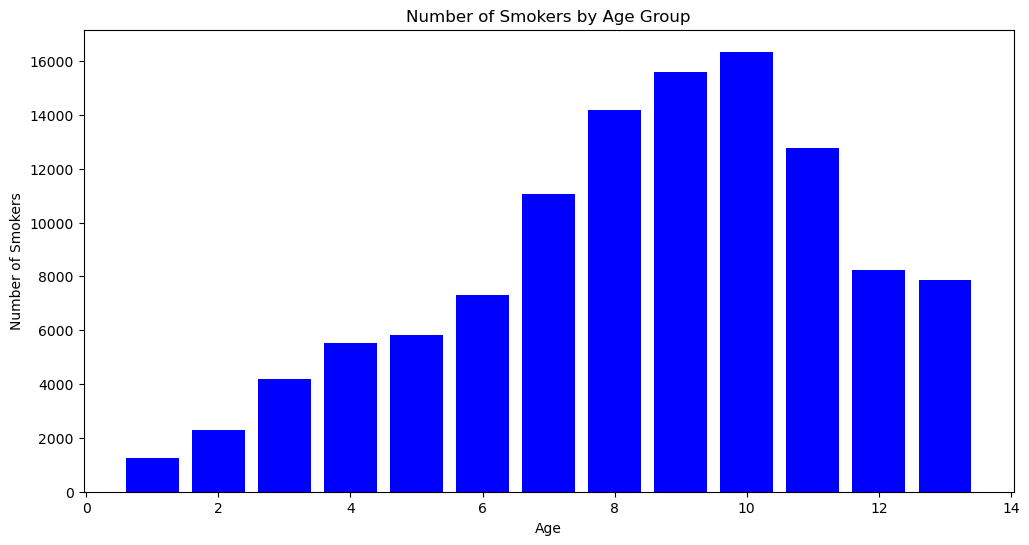

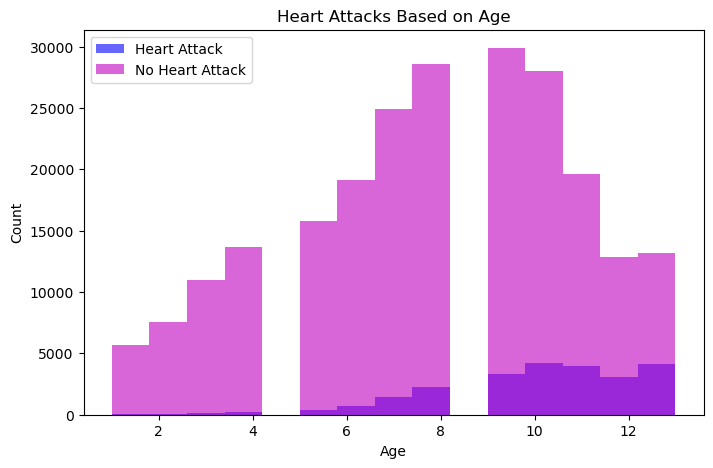

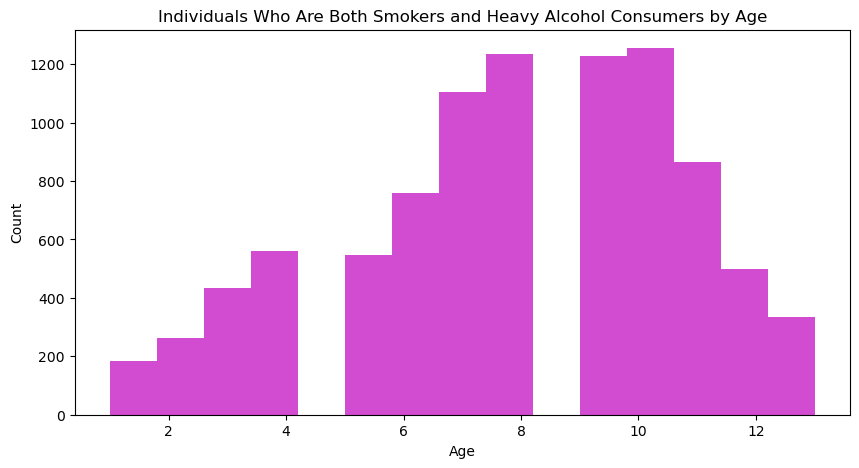

Accuracy: 0.9086250394197414
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69007
         1.0       0.54      0.13      0.21      7097

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104

Confusion Matrix:
 [[68212   795]
 [ 6159   938]]


In [6]:
#Binary Logistic Regression 
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load the data
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df
df.isnull().sum()
df.info()
df.head(15)
#Remove education column 
df.drop('Education', axis=1, inplace=True)

# Visualization 1: Number of Smokers based on Age and Alcohol Consumption
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['HvyAlcoholConsump'], c=df['Smoker'], cmap='coolwarm', alpha=0.5)  
#c means maps data values to colors,helping distinguish smokers from non-smokers in the scatter
plt.title('Number of Smokers Based on Age and Alcohol Consumption')
plt.xlabel('Age')
plt.ylabel('Heavy Alcohol Consumption')
plt.colorbar(label='Smoker (0 = No, 1 = Yes)')
plt.show()
#or
# Bar plot alternative - Smokers count per Age group
plt.figure(figsize=(12, 6))
smoker_counts = df.groupby('Age')['Smoker'].sum()
plt.bar(smoker_counts.index, smoker_counts.values, color='blue')
plt.title('Number of Smokers by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.show()

# Visualization 2: Number of Heart Attacks based on Age
plt.figure(figsize=(8, 5))
plt.hist(df[df['HeartDiseaseorAttack'] == 1]['Age'], bins=15, alpha=0.6, color='blue', label='Heart Attack')
plt.hist(df[df['HeartDiseaseorAttack'] == 0]['Age'], bins=15, alpha=0.6, color='m', label='No Heart Attack')
plt.title('Heart Attacks Based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualization 3: Individuals who are BOTH Smokers and Heavy Alcohol Consumers based on Age
plt.figure(figsize=(10, 5))
both_conditions = (df['Smoker'] == 1) & (df['HvyAlcoholConsump'] == 1)
plt.hist(df[both_conditions]['Age'], bins=15, color='m', alpha=0.7)
plt.title('Individuals Who Are Both Smokers and Heavy Alcohol Consumers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Prepare data for Logistic Regression
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))